In [115]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import statsmodels.api as sm

## load data

In [31]:
Cab_data = pd.read_csv('Cab_data.csv')
City = pd.read_csv('City.csv')
Customer_id = pd.read_csv('Customer_ID.csv')
Transaction_id = pd.read_csv('Transaction_ID.csv')

In [80]:
Cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2132-02-09,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2132-02-07,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2132-02-03,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2132-02-08,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2132-02-04,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [83]:
start_date = pd.Timestamp('2016-01-31') - pd.Timedelta(days=42371)
print(start_date)

1900-01-28 00:00:00


In [85]:
Cab_data['Date of Travel'] = Cab_data['Date of Travel'] - pd.DateOffset(years=116)

In [86]:
print(Cab_data['Date of Travel'].min())
print(Cab_data['Date of Travel'].max())

2016-02-03 00:00:00
2019-02-01 00:00:00


In [33]:
City.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [34]:
Customer_id.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [35]:
Transaction_id.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


## merge data

In [87]:
df1 = Cab_data.merge(City,on='City',how='left')
df3_4 = Transaction_id.merge(Customer_id,on='Customer ID',how='left')

In [88]:
df1.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,10000011,2016-02-09,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701"
1,10000012,2016-02-07,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701"
2,10000013,2016-02-03,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701"
3,10000014,2016-02-08,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701"
4,10000015,2016-02-04,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701"


In [89]:
df3_4.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,Male,28,10813
1,10000012,27703,Card,Male,27,9237
2,10000013,28712,Cash,Male,53,11242
3,10000014,28020,Cash,Male,23,23327
4,10000015,27182,Card,Male,33,8536


In [90]:
df = df1.merge(df3_4,on='Transaction ID',how='inner')
df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-02-09,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701",29290,Card,Male,28,10813
1,10000012,2016-02-07,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701",27703,Card,Male,27,9237
2,10000013,2016-02-03,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701",28712,Cash,Male,53,11242
3,10000014,2016-02-08,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701",28020,Cash,Male,23,23327
4,10000015,2016-02-04,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701",27182,Card,Male,33,8536


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Population          359392 non-null  object        
 8   Users               359392 non-null  object        
 9   Customer ID         359392 non-null  int64         
 10  Payment_Mode        359392 non-null  object        
 11  Gender              359392 non-null  object        
 12  Age                 359392 non-null  int64         
 13  Income (USD/Month)  359392 no

In [92]:
df.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month)
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113,19191.652115,35.336705,15048.822937
std,1.268058e+05,12.233526,274.378911,157.993661,21012.412463,12.594234,7969.409482
min,1.000001e+07,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000
25%,1.011081e+07,12.000000,206.437500,151.200000,2705.000000,25.000000,8424.000000
50%,1.022104e+07,22.440000,386.360000,282.480000,7459.000000,33.000000,14685.000000
75%,1.033094e+07,32.960000,583.660000,413.683200,36078.000000,42.000000,21035.000000
max,1.044011e+07,48.000000,2048.030000,691.200000,60000.000000,65.000000,35000.000000


In [93]:
df['Population'] = df['Population'].str.replace(',', '')
df['Users'] = df['Users'].str.replace(',', '')

df['Population'] = pd.to_numeric(df['Population'], errors='coerce')
df['Users'] = pd.to_numeric(df['Users'], errors='coerce')

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Date of Travel      359392 non-null  datetime64[ns]
 2   Company             359392 non-null  object        
 3   City                359392 non-null  object        
 4   KM Travelled        359392 non-null  float64       
 5   Price Charged       359392 non-null  float64       
 6   Cost of Trip        359392 non-null  float64       
 7   Population          359392 non-null  int64         
 8   Users               359392 non-null  int64         
 9   Customer ID         359392 non-null  int64         
 10  Payment_Mode        359392 non-null  object        
 11  Gender              359392 non-null  object        
 12  Age                 359392 non-null  int64         
 13  Income (USD/Month)  359392 no

### The relationships could be:
1.City-Population-Users: Cities with larger populations might have a larger number of users.

2.Price Charged-Cost of Trip: The difference between the price charged and the cost of the trip can provide information about the profit or loss from each journey.

3.KM Travelled-Price Charged: There might be a direct relationship between the distance travelled and the price charged to the customer.

4.Age-Income: There might be a relationship between the age of a customer and their income, as income can often increase with age and work experience.

5.Company-Price Charged: Different companies might charge different prices for their services.

6.Payment Mode-Company: Customers might prefer different payment modes depending on the company.

## remove duplicates

In [95]:
df = df.drop_duplicates()

## check for missing values

In [96]:
print(df.isnull().sum())#No missing values

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Population            0
Users                 0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64


## Outlier detection

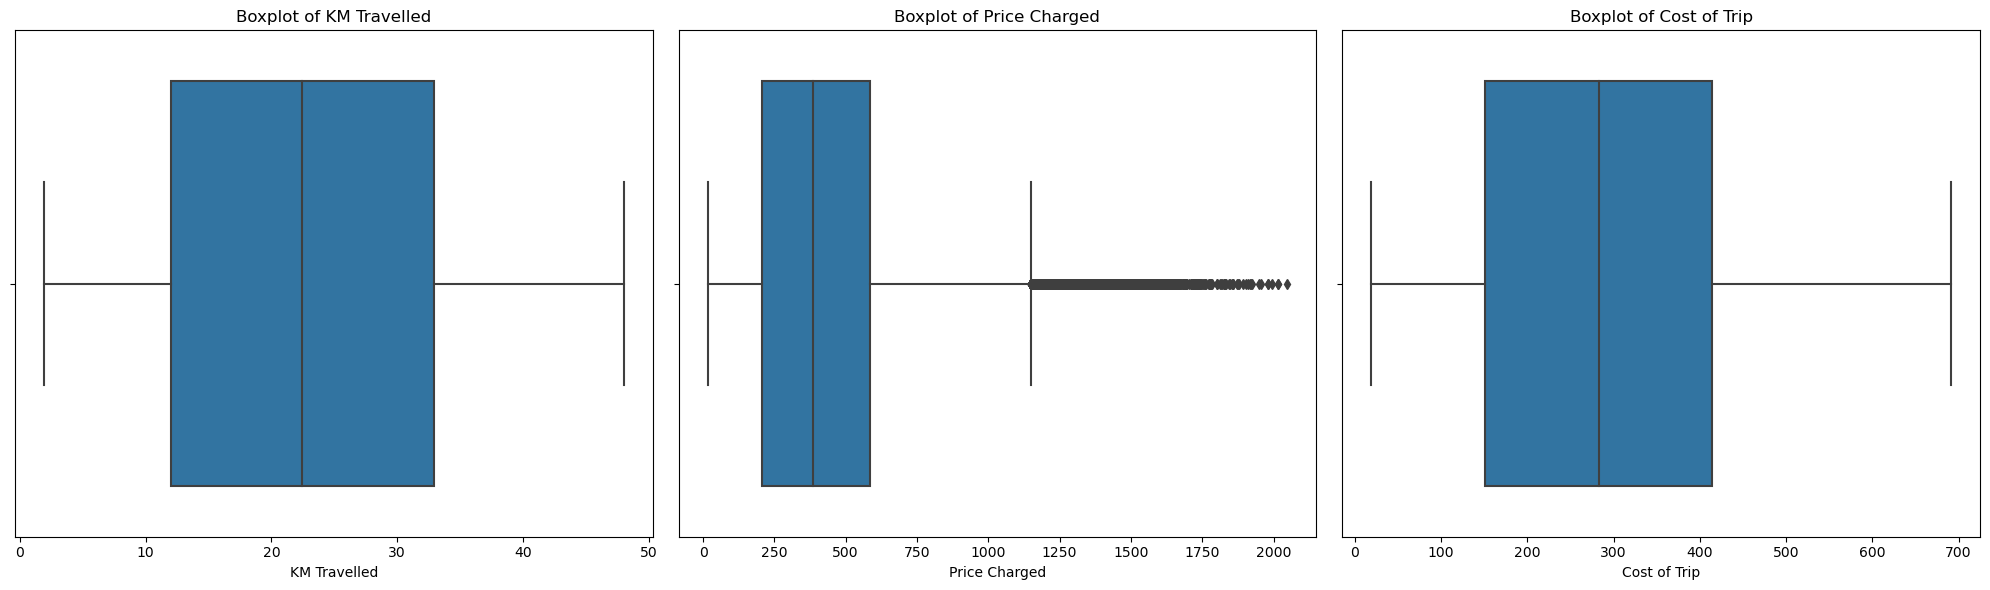

In [97]:
# Select only float64 type columns
float_columns = df.select_dtypes(include=['float64']).columns

# Create a new figure and a 1x3 subplots grid
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

# Create a boxplot for each float64 type column
for i, col in enumerate(float_columns):
    sns.boxplot(x=df[col], ax=axs[i])
    axs[i].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()# too much outliers for the price charged 

In [98]:

from pandas_profiling import ProfileReport

# Assuming df is your DataFrame
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)

# To display the report in the notebook
profile.to_widgets()

# To save the report as an html file
profile.to_file("output.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Hypotheses

1.Is there any seasonality in number of customers using the cab service?

2.Is the number of customers in Pink Cab less than the other one during the observation period?

3.Does margin proportionally increase with increase in number of customers for each of the two companies?

4.Are 'Income (USD/Month)', 'Age', 'Cost of Trip', 'KM Travelled' all related to the price charged?

5.Is the New York has the most total payments?

6.Do customers with higher income tend to travel more kilometers?

7.Do older customers pay more on average for their trips?

### 1.

In [99]:
df['Date of Travel']

0        2016-02-09
1        2016-02-07
2        2016-02-03
3        2016-02-08
4        2016-02-04
            ...    
359387   2018-02-09
359388   2018-02-05
359389   2018-02-06
359390   2018-02-06
359391   2018-02-03
Name: Date of Travel, Length: 359392, dtype: datetime64[ns]

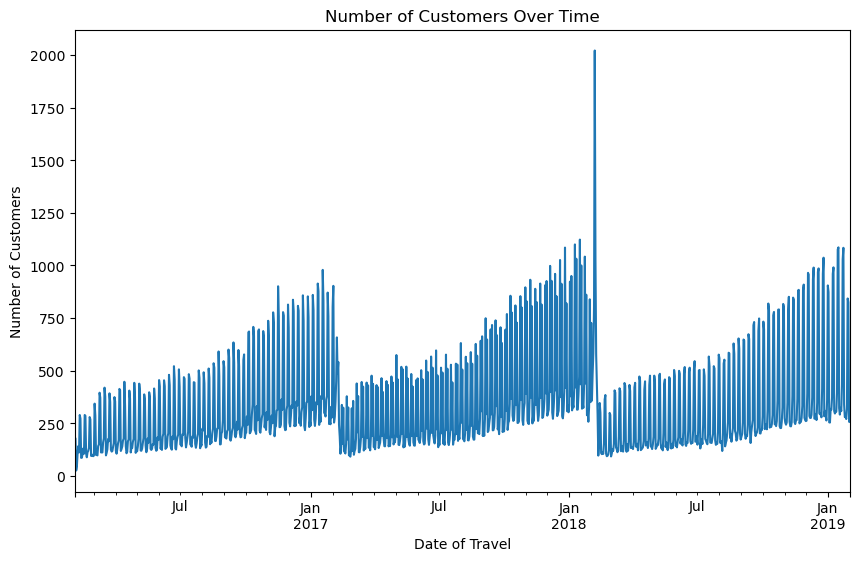

In [100]:
# Convert 'Date of Travel' to datetime if it isn't already
df['Date of Travel'] = pd.to_datetime(df['Date of Travel'])

# Aggregate data by date
daily_data = df.groupby('Date of Travel').size()

# Plot the data
plt.figure(figsize=(10, 6))
daily_data.plot()
plt.title('Number of Customers Over Time')
plt.ylabel('Number of Customers')
plt.xlabel('Date of Travel')
plt.show()

Based on above graph, the data has period which is one year. 

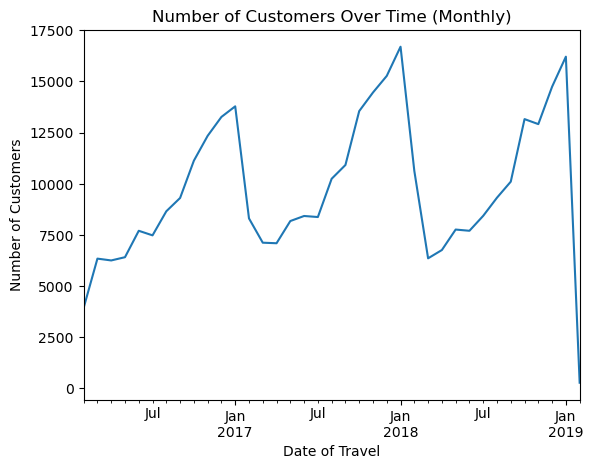

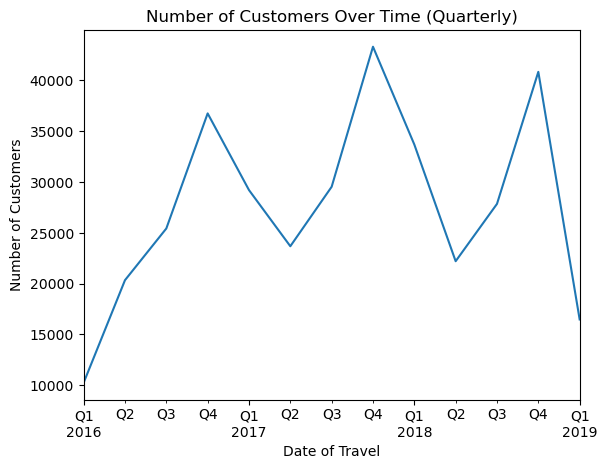

In [101]:
# Group by month
monthly_data = Cab_data.groupby(Cab_data['Date of Travel'].dt.to_period('M')).size()

# Plot the monthly data
monthly_data.plot()
plt.title('Number of Customers Over Time (Monthly)')
plt.ylabel('Number of Customers')
plt.show()

# Group by quarter
quarterly_data = Cab_data.groupby(Cab_data['Date of Travel'].dt.to_period('Q')).size()

# Plot the quarterly data
quarterly_data.plot()
plt.title('Number of Customers Over Time (Quarterly)')
plt.ylabel('Number of Customers')
plt.show()

Quarterly seasonality: The 4th quarter (October-December) of each year appears to have more cab rides compared to the other quarters, showing an increase in the number of cab rides in this quarter. This could suggest that people use cab services more frequently in the last quarter of the year.

Monthly seasonality: If we look at the monthly data, it seems like there's a similar trend where the months from October to January have more cab rides, and then there's a decrease in the following months. The pattern seems to repeat every year.

Yearly trend: It seems there is an overall increase in cab usage from 2016 to 2018. However, in 2019, there is a sudden drop in cab usage in February. Please note that this might be due to incomplete data for 2019.

### 2.

In [105]:
# Count the number of unique customers for each company
customer_counts = df.groupby('Company')['Customer ID'].nunique()

# Display the results
print(customer_counts)

Company
Pink Cab      32330
Yellow Cab    39896
Name: Customer ID, dtype: int64


Yes, the customers of Pink Cab is less than the Yellow Cab during the observation period.

### 3.

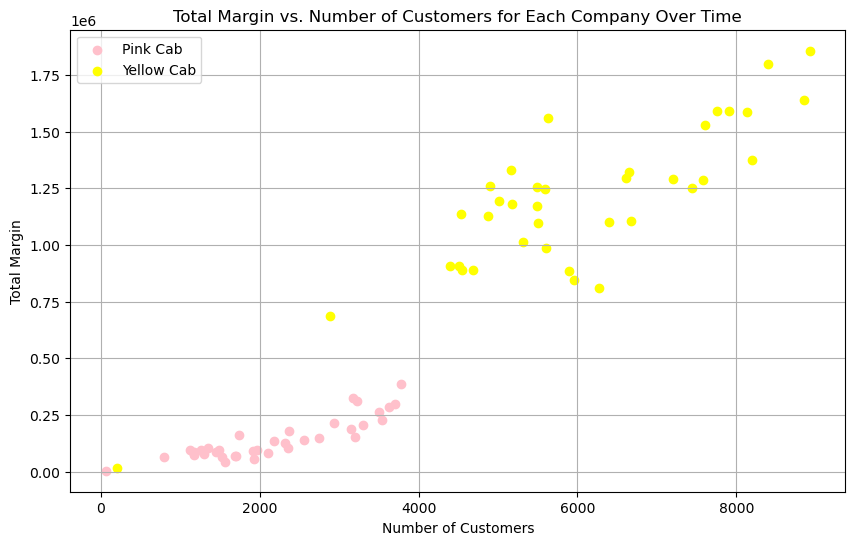

In [112]:
# Convert 'Date of Travel' to datetime format if it's not already
df['Date of Travel'] = pd.to_datetime(df['Date of Travel'])

# Create a new column for the year and month
df['YearMonth'] = df['Date of Travel'].dt.to_period('M')

# Calculate the margin for each transaction
df['Margin'] = df['Price Charged'] - df['Cost of Trip']

# Group by YearMonth and Company, then aggregate by the number of unique customers and the sum of the Margin
company_data_monthly = df.groupby(['YearMonth', 'Company']).agg({'Customer ID':'nunique', 'Margin':'sum'}).reset_index()

# Split the data for each company
pink_cab_data = company_data_monthly[company_data_monthly['Company'] == 'Pink Cab']
yellow_cab_data = company_data_monthly[company_data_monthly['Company'] == 'Yellow Cab']

# Plot the number of customers against the margin for each company
plt.figure(figsize=(10, 6))

plt.scatter(pink_cab_data['Customer ID'], pink_cab_data['Margin'], color='pink', label='Pink Cab')
plt.scatter(yellow_cab_data['Customer ID'], yellow_cab_data['Margin'], color='yellow', label='Yellow Cab')

plt.xlabel('Number of Customers')
plt.ylabel('Total Margin')
plt.title('Total Margin vs. Number of Customers for Each Company Over Time')
plt.legend()
plt.grid(True)
plt.show()


Since the slope is positive in this data, the Number of Customers increase with the increase of total margin.

### 4.

In [119]:
X = df[['Income (USD/Month)', 'Age', 'Cost of Trip', 'KM Travelled']]
X = sm.add_constant(X)  # adding a constant
model = sm.OLS(df['Price Charged'], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Price Charged   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                 2.574e+05
Date:                Sat, 20 May 2023   Prob (F-statistic):               0.00
Time:                        21:51:07   Log-Likelihood:            -2.2848e+06
No. Observations:              359392   AIC:                         4.570e+06
Df Residuals:                  359387   BIC:                         4.570e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.6979      0

In [120]:
def backward_elimination(data, target, significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]  # we skip the constant's p-value
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 

    return features

selected_features = backward_elimination(df[['Income (USD/Month)', 'Age', 'Cost of Trip', 'KM Travelled']], df['Price Charged'])
print(selected_features)

['Income (USD/Month)', 'Age', 'Cost of Trip', 'KM Travelled']


"Income (USD/Month)": The coefficient is 0.0001, which means for every increase of 1 USD/Month in income, the price charged increases by 0.0001 units, keeping everything else constant.

"Age": The coefficient is -0.0649, indicating that for every additional year in age, the price charged decreases by 0.0649 units, keeping everything else constant.

"Cost of Trip": The coefficient is 1.8938, indicating that for every unit increase in the cost of the trip, the price charged increases by 1.8938 units, keeping everything else constant.

"KM Travelled": The coefficient is -5.2698, indicating that for each additional kilometer traveled, the price charged decreases by 5.2698 units, keeping everything else constant.

### 5.

In [122]:
# Group by the 'City' column and calculate the sum of 'Price Charged' for each city
city_payments = df.groupby('City')['Price Charged'].sum()

# Find the city with the maximum total payments
max_payment_city = city_payments.idxmax()

print(max_payment_city)
print(city_payments)

NEW YORK NY
City
ATLANTA GA         2980241.72
AUSTIN TX          1877142.50
BOSTON MA         10359755.42
CHICAGO IL        19841318.52
DALLAS TX          3142429.91
DENVER CO          1462531.51
LOS ANGELES CA    17795624.41
MIAMI FL           2580135.20
NASHVILLE TN        959108.13
NEW YORK NY       56954061.67
ORANGE COUNTY      1554873.21
PHOENIX AZ          756682.64
PITTSBURGH PA       442538.64
SACRAMENTO CA       761611.95
SAN DIEGO CA       7136380.59
SEATTLE WA         2854316.26
SILICON VALLEY     3684102.15
TUCSON AZ           672580.26
WASHINGTON DC     16366703.83
Name: Price Charged, dtype: float64


Yes, it shows that the New York has the most price_charged, with 56,954,061.67 dollars in these three years.

### 6.

In [123]:
# We can use a correlation to test this
correlation = df['Income (USD/Month)'].corr(df['KM Travelled'])
print(f"Correlation between income and KM travelled: {correlation}")

Correlation between income and KM travelled: -0.000544062305959198


Based on the correlation between these two variables, there is no relationship between income and km travelled.

### 7.

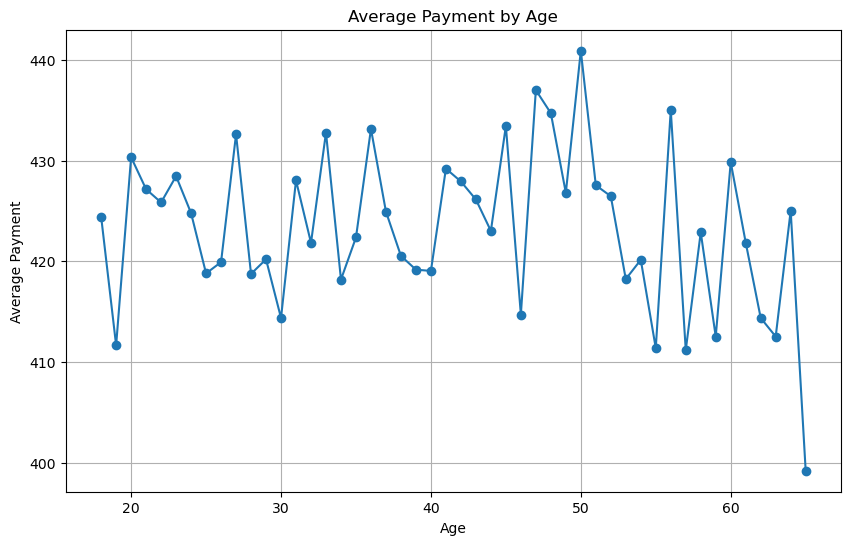

In [127]:
# We can group by age and then calculate average payment
average_payment_by_age = df.groupby('Age')['Price Charged'].mean()

# Create a line plot
plt.figure(figsize=(10,6))
plt.plot(average_payment_by_age.index, average_payment_by_age.values, marker='o')
plt.xlabel('Age')
plt.ylabel('Average Payment')
plt.title('Average Payment by Age')
plt.grid(True)
plt.show()

Based on the plot above, the line graph shows an upward trend when age is smaller than 50 and a downward trend after.